In [ ]:
# n = int(input("Enter number of elements: "))  
# arr = []  

# for i in range(n):  
#     k = int(input())  
#     arr.append(k)  

# ans = []  
# window = []  # Using a list since multiset is not natively available in Python

# for i in range(len(arr)):
#     window.append(arr[i])  # Equivalent to inserting into multiset
#     # Further logic can be added as needed


In [2]:
# def max_sliding_window(arr, k):
#     n = len(arr)
#     result = []
    
#     for i in range(n - k + 1):
#         max_in_window = max(arr[i:i + k])  # Find max in current window
#         result.append(max_in_window)
    
#     return result

# # Example usage
# arr = [1, 2,3,1,4,5]
# k = 3
# result = max_sliding_window(arr, k)
# print("Maximum elements for each subarray of size k:", result)


# Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Downloads/placement (1).csv")
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [3]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

Text(0, 0.5, 'PAckage')

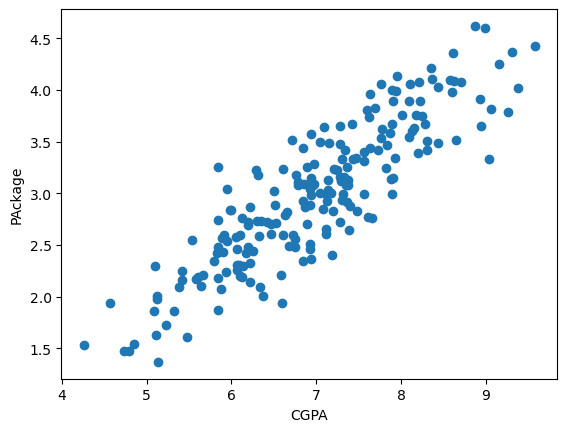

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('PAckage')


In [5]:
X=df.iloc[:,0:1]        # all rows and 1st column
Y=df.iloc[:,-1]         # all rows and last column

In [6]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [7]:
Y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=8)    
# random state : 4(x train.test, y train.test) stop shuffling of data every time to get accuracy and do not damage the data
# based on no. given (2 or 8) it give the train and testing randomly

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
Lr=LinearRegression()

In [11]:
Lr.fit(X_train,Y_train)

LinearRegression()

In [12]:
Y_test    #predicted value

67     2.89
69     2.94
193    1.94
161    3.33
65     3.81
88     1.48
128    3.34
119    2.65
181    3.89
117    2.99
169    4.37
146    2.46
142    3.04
151    2.76
190    2.69
1      1.98
27     2.16
150    2.73
0      3.26
103    3.00
42     2.54
130    2.49
23     2.48
145    2.18
139    2.40
100    4.14
176    3.23
185    3.18
156    3.13
44     1.86
170    2.87
26     3.42
173    2.56
25     3.65
198    3.96
68     2.99
3      3.67
52     4.11
77     4.60
194    3.67
Name: package, dtype: float64

In [13]:
Lr.predict(X_test.iloc[0].values.reshape(1,1))           #iloc is for fetching the element

C:\Users\91766\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.70216408])

Text(0, 0.5, 'PAckage')

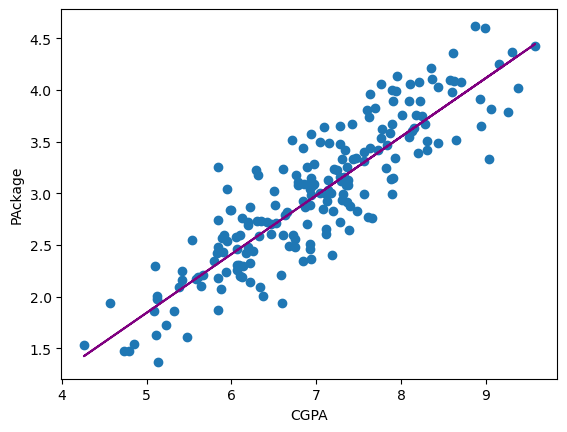

In [14]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,Lr.predict(X_train),color='purple')       #to show predicted line 
plt.xlabel('CGPA')
plt.ylabel('PAckage')

In [15]:
# y=mx+b

In [16]:
m=Lr.coef_      #inbuild function
m

array([0.56721404])

In [17]:
b=Lr.intercept_
b

-0.9903993402051201

In [18]:
y=m*16.6+b
y

array([8.42535377])

# multiple linear regression

In [ ]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
X,Y=make_regression(n_samples=100,n_features=2,n_informative=2,n_targets=1,noise=50)  #noise: from the plan divide the data 50%equaly


In [ ]:
df=pd.DataFrame({"feature1":X[:,0],"feature2":X[:,1],"targate":Y})

In [ ]:
df

In [ ]:
fig=px.scatter_3d(df,x="feature1",y="feature2",z="targate")
fig.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)    #X=f1,f2 Y=t

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
Lr=LinearRegression()
Lr

In [ ]:
Lr.fit(X_train,Y_train)

In [ ]:
Y_pred = Lr.predict(X_test)

In [ ]:
#loss function
print("MAE",mean_absolute_error(Y_test,Y_pred))
print("MSE",mean_squared_error(Y_test,Y_pred))
print("R2 score",r2_score(Y_test,Y_pred))

In [ ]:
x=np.linspace(-5,5,10)            #generate (10) equal spaces between the range(-5,5)
y=np.linspace(-5,5,10)
xGrid,yGrid=np.meshgrid(y,x)
final =np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T
z_final=Lr.predict(final).reshape(10,10)
z=z_final

In [ ]:
fig=px.scatter_3d(df,x="feature1",y="feature2",z="targate")
fig.add_trace(go.Surface(x=x,y=y,z=z))
fig.show()

In [ ]:
Lr.coef_

In [ ]:
Lr.intercept_

# Logistic Regression

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns   #iris dataset
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [10]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [15]:
df=df[df['species']!='setosa']                   #shows only versicolor and verginica and remove setosa
df                                               # mask bool show only true values

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [18]:
df['species']=df['species'].map({'versicolor':0,'virginica':1})
df

C:\Users\91766\AppData\Local\Temp\ipykernel_12664\1107583295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species']=df['species'].map({'versicolor':0,'virginica':1})


,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [20]:
# split into x and y
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]


In [21]:
X

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
Y

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 100, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [25]:
from sklearn.linear_model import LogisticRegression
Classifier=LogisticRegression()

In [32]:
# model performs better using hypertuning
from sklearn.model_selection import GridSearchCV       #
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5],'max_iter':[100,200,300]}

In [33]:
classifier_regressor=GridSearchCV(Classifier,param_grid=parameter,scoring='accuracy',cv=5)  
#cv check 5 times , scoring checks accuracy, 

In [38]:
classifier_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5], 'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [39]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [40]:
print(classifier_regressor.best_score_)

0.9625


In [42]:
y_pred=classifier_regressor.predict(X_test)


In [43]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
70,5.9,3.2,4.8,1.8
60,5.0,2.0,3.5,1.0
146,6.3,2.5,5.0,1.9
66,5.6,3.0,4.5,1.5
113,5.7,2.5,5.0,2.0
74,6.4,2.9,4.3,1.3
103,6.3,2.9,5.6,1.8
147,6.5,3.0,5.2,2.0
91,6.1,3.0,4.6,1.4
97,6.2,2.9,4.3,1.3


In [44]:
from sklearn.metrics import accuracy_score,classification_report

In [46]:
score=accuracy_score(y_pred,Y_test)
score

0.95

In [48]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20



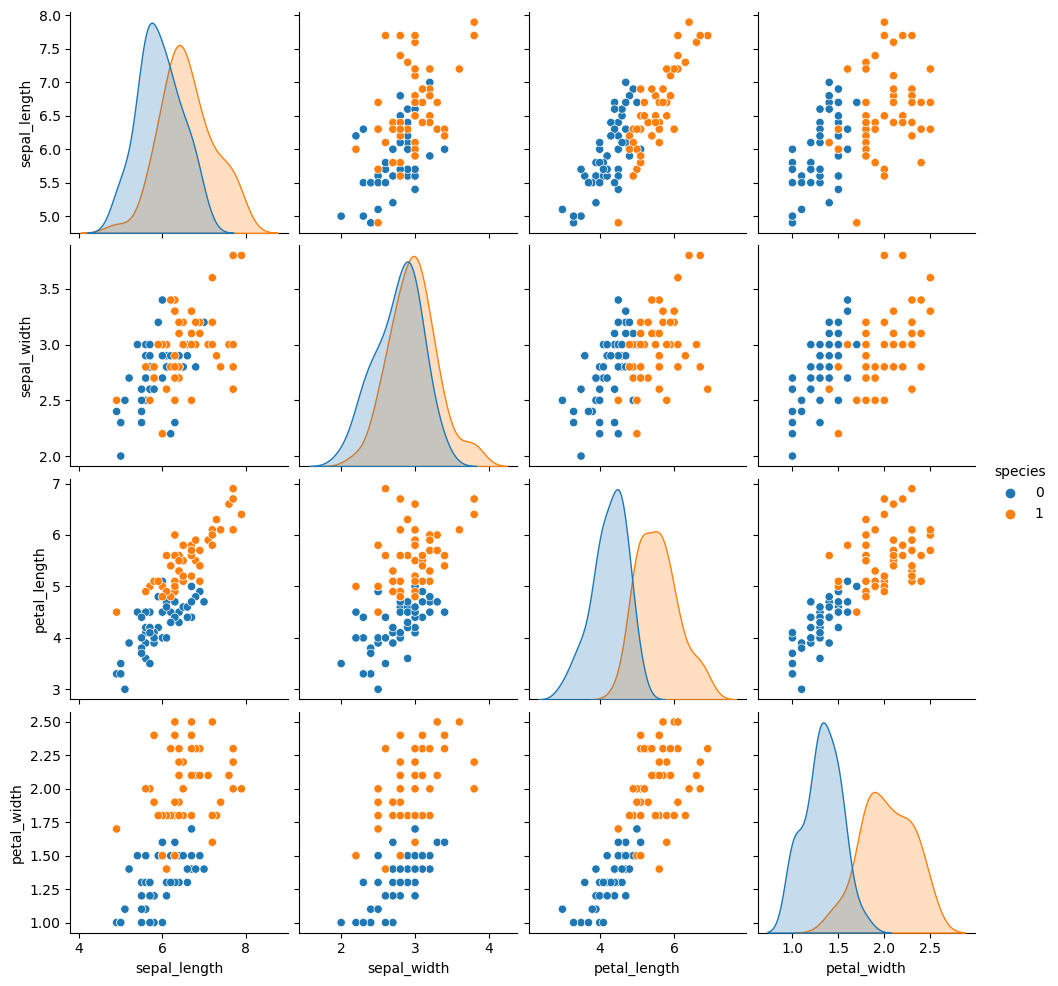

In [49]:
sns.pairplot(df,hue='species')

# Naive Bayes 


In [1]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Downloads/IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.shape

(50000, 2)

In [5]:
df["review"][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [6]:
''''Text clean 

1)sample 10000 rows
2)remove HTML tags
3)remove special character 
4)convert into lower case
5)remove stop words
6)steming '''



"'Text clean \n\n1)sample 10000 rows\n2)remove HTML tags\n3)remove special character \n4)convert into lower case\n5)remove stop words\n6)steming "

In [7]:
df=df.sample(10000)

In [8]:
df.shape

(10000, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 29024 to 41358
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 234.4+ KB


In [10]:
df["sentiment"].replace({"positive":1,"negative":0},inplace=True)
df

,review,sentiment
29024,The best screen performance ever by George C. ...,1
671,They've shown i twice in a very short time now...,0
1545,"Brides are dying at the altar, and their corps...",0
3297,This series and Elon Gold were being HYPED as ...,0
9458,I suppose bad Laurel and Hardy is better than ...,0
...,...,...
39103,I think that this movie is very fun and horror...,1
31774,"""Father Hood"" is an overlooked little gem of a...",1
45291,"""The Falcon and the Snowman"" is the story of t...",1
9964,I'm a big fan of Patricia Hodge and Mariam Mar...,0


In [11]:
#remove html tag
import re
clean=re.compile("<.*?>")
re.sub(clean,"",df.iloc[7360].review )

'When I played the first Soul Calibur on dreamcast I thought it was great. When I played the second I was hooked. And finally when Soul Calibur III was released, I bought a playstation 2 and the game.This can really keep you up for hours, with a huge amount of characters, loads of unlockable content, and not to mention a GREAT fighting system, this really is the greatest fighting game to date. The games strong points is foremost the vs. gameplay, were two human players battle each other, either playing as one of the main characters or as a created and customized character. The Create character option is vast, and allows the player to make thousands of different combinations.The only thing that bothers me is that if you create a character that uses the fighting style "Grieve Edge" (only kicks) has to wear those ridiculous shoes. ^^This is absolutely the greatest fighting game one could wish for. Now, I\'m just hoping the planned movie won\'t be crap.'

In [12]:
#remove html tags

def clean_html(text):            
    clean =re.compile("<.*?>#")
    return re.sub(clean,"",text)

In [13]:
df["review"]=df["review"].apply(clean_html)

In [14]:
df

,review,sentiment
29024,The best screen performance ever by George C. ...,1
671,They've shown i twice in a very short time now...,0
1545,"Brides are dying at the altar, and their corps...",0
3297,This series and Elon Gold were being HYPED as ...,0
9458,I suppose bad Laurel and Hardy is better than ...,0
...,...,...
39103,I think that this movie is very fun and horror...,1
31774,"""Father Hood"" is an overlooked little gem of a...",1
45291,"""The Falcon and the Snowman"" is the story of t...",1
9964,I'm a big fan of Patricia Hodge and Mariam Mar...,0


In [15]:
df['review'].iloc[1]

"They've shown i twice in a very short time now here in Sweden and I am so very tired of it. The bad acting isn't enough... The story itself is so boring and the effects hardly exists. I love the original from 1953 so I recommend you to go and rent that one instead. Because this one is such a bore."

In [16]:
# convert into lowercase
def convert_lower(text):
    return text.lower()

In [17]:
df["review"]=df["review"].apply(convert_lower)

In [18]:
df

,review,sentiment
29024,the best screen performance ever by george c. ...,1
671,they've shown i twice in a very short time now...,0
1545,"brides are dying at the altar, and their corps...",0
3297,this series and elon gold were being hyped as ...,0
9458,i suppose bad laurel and hardy is better than ...,0
...,...,...
39103,i think that this movie is very fun and horror...,1
31774,"""father hood"" is an overlooked little gem of a...",1
45291,"""the falcon and the snowman"" is the story of t...",1
9964,i'm a big fan of patricia hodge and mariam mar...,0


In [19]:
df.head()

,review,sentiment
29024,the best screen performance ever by george c. ...,1
671,they've shown i twice in a very short time now...,0
1545,"brides are dying at the altar, and their corps...",0
3297,this series and elon gold were being hyped as ...,0
9458,i suppose bad laurel and hardy is better than ...,0


In [20]:
#remove special char
def remove_special(text):
    x= " "
    for i in text:
        if i.isalnum():
            x=x+i
        else:
            x=x+" "
    return x        

In [21]:
df["review"]=df["review"].apply(remove_special)

In [22]:
df.head()

,review,sentiment
29024,the best screen performance ever by george c ...,1
671,they ve shown i twice in a very short time no...,0
1545,brides are dying at the altar and their corp...,0
3297,this series and elon gold were being hyped as...,0
9458,i suppose bad laurel and hardy is better than...,0


In [23]:
df.iloc[4591].review

' admirable but weak james bond film mainly because both the hero  bond  and villain  blofeld  were seriously miscast  lazenby is too big and innocent looking to play bond  he looks and acts more like the good natured but dim witted sidekick in a police action movie  the director and writer try to establish his credibility  but his saying of lines like  royal baluga  north of the      just aren t effective in establishing him as this worldly and suave rogue  savalas doesn t do a bad job  but his characterization and behavior is more fitting of a mob gangster  the best portrayed characters of the movie are those of tracy and her father  but the performances by those actors when sharing the screen with lazenby only serve to emphasize his deficiencies as an actor  this movie is too long  140 mins   for a bond film and doesn t offer any excitement until bond s mountain escape  where it begins to pick up  this film tries very hard  but falls short  many bondian elements are present and the 

In [24]:
# remove stop words
import nltk

In [25]:
from nltk.corpus import stopwords

In [26]:
#import nltk
#nltk.download()

In [27]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
len(stopwords.words("english"))

179

In [29]:
def remove_stopwords(text):
    x=[]
    for i in text.split():
        if i not in stopwords.words("english"):
            x.append(i)
    y=x[:]
    x.clear()
    return y
        

In [ ]:
df["review"]=df["review"].apply(remove_stopwords)
df

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [ ]:
y=[]
def stem_words(text):
    for i in text:
        y.append(ps.stem(i))
    z=y[:]
    y.clear ()
    return z

In [ ]:
stem_words("I","loved","loving")

In [ ]:
df["review"]=df["review"].apply(stem_words)
df


In [ ]:
#joining 
 
def join_back(list_input):
    return " ".join(list_input)

In [ ]:
df["review"]=df["review"].apply(join_back)
df

In [ ]:
X=df.iloc[:,0:1].values

In [ ]:
X.shape

In [ ]:
from skelearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [ ]:
x=cv.fit_transform(df["review"]).toarray()

In [ ]:
x.shape

In [ ]:
y=df.iloc[:,-1].values
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_text,Y_train,Y_test= train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinominalNB,BernoulliNB

In [ ]:
clf1=GaussianNB()
clf2=MultinominalNB()
clf3=BernoulliNB()

In [ ]:
print(clf1.fit(X_train,Y_train))
print(clf2.fit(X_train,Y_train))
print(clf3.fit(X_train,Y_train))

In [ ]:
y_pred1=clf1.predict(x_test)
y_pred2=clf2.predict(x_test)
y_pred3=clf3.predict(x_test)

In [ ]:
from sklearn.matrics import accuracy_score

In [ ]:
print("GaussianNB",accuracy_score(Y_test,Y_pred1))
print("MultinominalNB",accuracy_score(Y_test,Y_pred2))
print("BernoulliNB",accuracy_score(Y_test,Y_pred3))

In [ ]:
import numpy as np
import pandas as pd
import nltk
import re

### Text cleanup

1)HTML tags remove
2)remove emoji
3)spelling checker (correction)


### Basic text processing

1)basic ------> 1)Tokenization  ------> sentence ,toke,word toke
2)optional----> 1)remove stopwords(meaning less words like: the) 2)steming  3)remove digit and puncutuation 
                 4) lemmatization 5)lnguage detection
                 

### Advance Text Prepossing
 
 1)Parts if speech
 2)parsing
 3)co refernce resolution


In [ ]:
df=pd.read_csv("Downloads/IMDB Dataset.csv")
df

In [ ]:
df["review"][4]

In [ ]:
text=df["review"][4]

In [ ]:
# 
def remove_html(text):
    clean =re.compile("<.*?>")
    return  re.sub(clean,"",text)

In [ ]:
remove_html(text)

In [ ]:
df=df.sample(100)
df

In [ ]:
df["review"]=df["review"].apply(remove_html) 

In [ ]:
df["review"][41952]

In [ ]:
#url remove

import re

def remove_urls(text):
    url_pattern=r"(?:http|https|ftp)://[^ ]+"
    return re.sub(url_pattern,"",text)

In [ ]:
text1="check notebook here https://colab.google.com/drive"

In [ ]:
remove_urls(text1)

In [ ]:
text2="check notebook www.google.com"
remove_urls(text2)

# remove digits and punctuation
  hii! how are you

In [ ]:
import string 
string.punctuation

In [ ]:
exclude=string.punctuation 

In [ ]:
def remove_punc(text):
    for i in exclude:
        text=text.replace(i,"")
    return text

In [ ]:
text2="string ..! with punctuation?"


In [ ]:
remove_punc(text2)

In [ ]:
#remove special digit
def remove_digit(text):
    x= " "
    for i in text:
        if i.isalpha():
            x=x+i
        else:
            x=x+" "
    return x        

In [ ]:
text3="string ..! with punctuation?"

In [ ]:
remove_digit(text3)

In [ ]:
!pip install textblob

In [ ]:
#spell check
import textblob

In [ ]:
from textblob import TextBlob

In [ ]:
incorrect_text="ccertain ccondition durring seveal grnrrations modifyaed arre samme manner"

In [ ]:
from textblob import TextBlob
incorrect_text="ccertain ccondition durring seveal grnrrations modifyaed arre samme manner"
textblob=TextBlob(incorrect_text)
textblob.correct()

In [ ]:
#remove stopwords
import nltk
from nltk.corpus import stopwords
stopwords.words("spanish")        #function

In [ ]:
def remove_stopwords(text):
    x=[]
    for i in text.split():
        
        if i not in stopwords.words("english"):
            x.append(i)
    y=x[:]
    x.clear()
    return y
           

In [ ]:
text4='''A system that told you exactly where to put every piece of information in your life – every document, file, note, agenda, outline, and bit of research – and exactly where to find it when you needed it.

Such a system would need to be incredibly easy to set up, and even easier to maintain. After all, only the simplest, most effortless habits endure long term.'''

In [ ]:
remove_stopwords(text4)

### handling emoji

remove 

replace with its meaning

replace covert into its ascii values
or machine lang

In [ ]:
emoji_text='What emoji does 🥰 mean?🥰 Smiling Face With Hearts emoji Meaning | Dictionary.comThe Smiling Face with Hearts emoji 🥰 depicts a smiling face behind three hearts. Is a person or thing. Like many other emoji depicting hearts, the Smiling Face with Hearts emoji 🥰' 

In [ ]:
emoji_text.encode("UTF-8")

In [ ]:
def remove_emoji(text):
    emoji_pattern=re.compile("[\u263a-\u26ff\u2700-\u27bf\U0001f600-\U0001f64f\U0001f300-\U0001f5ff\U0001f680-\U0001f6ff\U0001f700-\U0001f77f\U0001f780-\U0001f7ff\U0001f800-\U0001f8ff\U0001f900-\U0001f9ff\U0001fa00-\U0001faff]")
    return re.sub(r"",text)

In [ ]:
#remove emoji
emoji_text="I love programming! 💻❤️ It’s so rewarding to solve problems and create cool things. 🚀😊"
remove_emoji(emoji_text)

In [ ]:
!pip install emoji

In [ ]:
import emoji

In [ ]:
#give emoji meaning
print(emoji.demojize("I love programming! 💻❤️ It’s so rewarding to solve problems and create cool things. 🚀😊"))

In [3]:
li = [
    "AFAIK=As Far As I Know",
    "AFK=Away From Keyboard",
    "ASAP=As Soon As Possible",
    "ATK=At The Keyboard",
    "ATM=At The Moment",
    "A3=Anytime, Anywhere, Anyplace",
    "BAK=Back At Keyboard",
    "BBL=Be Back Later",
    "BBS=Be Back Soon",
    "BFN=Bye For Now",
    "B4N=Bye For Now",
    "BRB=Be Right Back",
    "BRT=Be Right There",
    "BTW=By The Way",
    "B4=Before",
    "CU=See You",
    "CUL8R=See You Later",
    "CYA=See You",
    "FAQ=Frequently Asked Questions",
    "FC=Fingers Crossed",
    "FWIW=For What It's Worth",
    "FYI=For Your Information",
    "GAL=Get A Life",
    "GG=Good Game",
    "GN=Good Night",
    "GMTA=Great Minds Think Alike",
    "GR8=Great!",
    "G9=Genius",
    "IC=I See",
    "ICQ=I Seek you (also a chat program)",
    "ILU=I Love You",
    "IMHO=In My Honest/Humble Opinion",
    "IMO=In My Opinion",
    "IOW=In Other Words",
    "IRL=In Real Life",
    "KISS=Keep It Simple, Stupid",
    "LDR=Long Distance Relationship",
    "LMAO=Laugh My A.. Off",
    "LOL=Laughing Out Loud",
    "LTNS=Long Time No See",
    "L8R=Later",
    "MTE=My Thoughts Exactly",
    "M8=Mate",
    "NRN=No Reply Necessary",
    "OIC=Oh I See",
    "PITA=Pain In The A..",
    "PRT=Party",
    "PRW=Parents Are Watching",
    "QPSA?=Que Pasa?",
    "ROFL=Rolling On The Floor Laughing",
    "ROFLOL=Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO=Rolling On The Floor Laughing My A.. Off",
    "SK8=Skate",
    "STATS=Your sex and age",
    "ASL=Age, Sex, Location",
    "THX=Thank You",
    "TTFN=Ta-Ta For Now!",
    "TTYL=Talk To You Later",
    "U=You",
    "U2=You Too",
    "U4E=Yours For Ever",
    "WB=Welcome Back",
    "WTF=What The F...",
    "WTG=Way To Go!",
    "WUF=Where Are You From?",
    "W8=Wait...",
    "7K=Sick:-D Laugher",
    "TFW=That feeling when",
    "MFW=My face when",
    "MRW=My reaction when",
    "IFYP=I feel your pain",
    "LOL=Laughing out loud",
    "TNTL=Trying not to laugh",
    "JK=Just kidding",
    "IDC=I don’t care",
    "ILY=I love you",
    "IMU=I miss you",
    "ADIH=Another day in hell",
    "ZZZ=Sleeping, bored, tired",
    "WYWH=Wish you were here",
    "TIME=Tears in my eyes",
    "BAE=Before anyone else",
    "FIMH=Forever in my heart",
    "BSAAW=Big smile and a wink",
    "BWL=Bursting with laughter",
    "LMAO=Laughing my a** off",
    "BFF=Best friends forever",
    "CSL=Can’t stop laughing"
]


In [4]:
li

['AFAIK=As Far As I Know',
 'AFK=Away From Keyboard',
 'ASAP=As Soon As Possible',
 'ATK=At The Keyboard',
 'ATM=At The Moment',
 'A3=Anytime, Anywhere, Anyplace',
 'BAK=Back At Keyboard',
 'BBL=Be Back Later',
 'BBS=Be Back Soon',
 'BFN=Bye For Now',
 'B4N=Bye For Now',
 'BRB=Be Right Back',
 'BRT=Be Right There',
 'BTW=By The Way',
 'B4=Before',
 'CU=See You',
 'CUL8R=See You Later',
 'CYA=See You',
 'FAQ=Frequently Asked Questions',
 'FC=Fingers Crossed',
 "FWIW=For What It's Worth",
 'FYI=For Your Information',
 'GAL=Get A Life',
 'GG=Good Game',
 'GN=Good Night',
 'GMTA=Great Minds Think Alike',
 'GR8=Great!',
 'G9=Genius',
 'IC=I See',
 'ICQ=I Seek you (also a chat program)',
 'ILU=I Love You',
 'IMHO=In My Honest/Humble Opinion',
 'IMO=In My Opinion',
 'IOW=In Other Words',
 'IRL=In Real Life',
 'KISS=Keep It Simple, Stupid',
 'LDR=Long Distance Relationship',
 'LMAO=Laugh My A.. Off',
 'LOL=Laughing Out Loud',
 'LTNS=Long Time No See',
 'L8R=Later',
 'MTE=My Thoughts Exactly',


In [5]:
d={}
for i in li:
    key,value=i.split("=",1)
    d[key]=value
d

{'AFAIK': 'As Far As I Know',
 'AFK': 'Away From Keyboard',
 'ASAP': 'As Soon As Possible',
 'ATK': 'At The Keyboard',
 'ATM': 'At The Moment',
 'A3': 'Anytime, Anywhere, Anyplace',
 'BAK': 'Back At Keyboard',
 'BBL': 'Be Back Later',
 'BBS': 'Be Back Soon',
 'BFN': 'Bye For Now',
 'B4N': 'Bye For Now',
 'BRB': 'Be Right Back',
 'BRT': 'Be Right There',
 'BTW': 'By The Way',
 'B4': 'Before',
 'CU': 'See You',
 'CUL8R': 'See You Later',
 'CYA': 'See You',
 'FAQ': 'Frequently Asked Questions',
 'FC': 'Fingers Crossed',
 'FWIW': "For What It's Worth",
 'FYI': 'For Your Information',
 'GAL': 'Get A Life',
 'GG': 'Good Game',
 'GN': 'Good Night',
 'GMTA': 'Great Minds Think Alike',
 'GR8': 'Great!',
 'G9': 'Genius',
 'IC': 'I See',
 'ICQ': 'I Seek you (also a chat program)',
 'ILU': 'I Love You',
 'IMHO': 'In My Honest/Humble Opinion',
 'IMO': 'In My Opinion',
 'IOW': 'In Other Words',
 'IRL': 'In Real Life',
 'KISS': 'Keep It Simple, Stupid',
 'LDR': 'Long Distance Relationship',
 'LMAO': 